In [55]:
from patsy import ModelDesc
import pandas as pd 
import numpy as np 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt 

## patsy

---

## patsy

> `patsy` is a Python package for describing statistical models (especially linear models, or models that have a linear component) and building design matrices. It is closely inspired by and compatible with the formula mini-language used in R and S.
> 
> ...
>
> Patsy’s goal is to become the standard high-level interface to describing statistical models in Python, regardless of what particular model or library is being used underneath.

---

## Formulas

```{python}
from patsy import ModelDesc

ModelDesc.from_formula("y ~ a + a:b + np.log(x)")
ModelDesc.from_formula("y ~ a*b + np.log(x) - 1")
```

---

## Model matrix

```{python}
from patsy import demo_data, dmatrix, dmatrices
```

.pull-left[
```{python}
data = demo_data("y", "a", "b", "x1", "x2")
data
pd.DataFrame(data)
```
]

.pull-right[
```{python}
dmatrix("a + a:b + np.exp(x1)", data)
```
]

.footnote[Note the `T.` in `a[T.a2]` is there to indicate treatment coding (i.e. typical dummy coding)]


---

## Model matrices

```{python}
y, x  = dmatrices("y ~ a + a:b + np.exp(x1)", data)
```

.pull-left[
```{python}
y
```
]


.pull-right[
```{python}
x
```
]

---

## as DataFrames

```{python}
dmatrix("a + a:b + np.exp(x1)", data, return_type='dataframe')
```


---

## Formula Syntax

<br/>

| Code     | Description                                       | Example      |
|:--------:|:--------------------------------------------------|:-------------|
| `+`      | unions terms on the left and right                | `a+a` ⇒ `a` |
| `-`      | removes terms on the right from terms on the left | `a+b-a` ⇒ `b` |
|`:`       | constructs interactions between each term on the left and right | `(a+b):c` ⇒  `a:c + b:c`|
| `*`      | short-hand for terms and their interactions       | `a*b` ⇒ `a + b + a:b` |
| `/`      | short-hand for left terms and their interactions with right terms | `a/b` ⇒ `a + a:b` |
| `I()`    | used for calculating arithmetic calculations      | `I(x1 + x2)` |
| `Q()`    | used to quote column names, e.g. columns with spaces or symbols | `Q('bad name!')` |
| `C()`    | used for categorical data coding                  |  `C(a, Treatment('a2'))` |

---


In [7]:
ModelDesc.from_formula("y ~ a + a:b + np.log(x)")

ModelDesc(lhs_termlist=[Term([EvalFactor('y')])],
          rhs_termlist=[Term([]),
                        Term([EvalFactor('a')]),
                        Term([EvalFactor('a'), EvalFactor('b')]),
                        Term([EvalFactor('np.log(x)')])])

In [8]:
ModelDesc.from_formula("y ~ a*b + np.log(x) - 1")

ModelDesc(lhs_termlist=[Term([EvalFactor('y')])],
          rhs_termlist=[Term([EvalFactor('a')]),
                        Term([EvalFactor('b')]),
                        Term([EvalFactor('a'), EvalFactor('b')]),
                        Term([EvalFactor('np.log(x)')])])

In [9]:
from patsy import demo_data, dmatrix, dmatrices

In [11]:
data = demo_data("y", "a", "b", "x1", "x2")
data

{'a': ['a1', 'a1', 'a2', 'a2', 'a1', 'a1', 'a2', 'a2'],
 'b': ['b1', 'b2', 'b1', 'b2', 'b1', 'b2', 'b1', 'b2'],
 'x1': array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721]),
 'x2': array([-0.10321885,  0.4105985 ,  0.14404357,  1.45427351,  0.76103773,
         0.12167502,  0.44386323,  0.33367433]),
 'y': array([ 1.49407907, -0.20515826,  0.3130677 , -0.85409574, -2.55298982,
         0.6536186 ,  0.8644362 , -0.74216502])}

In [12]:
pd.DataFrame(data)

,a,b,x1,x2,y
0,a1,b1,1.764052,-0.103219,1.494079
1,a1,b2,0.400157,0.410599,-0.205158
2,a2,b1,0.978738,0.144044,0.313068
3,a2,b2,2.240893,1.454274,-0.854096
4,a1,b1,1.867558,0.761038,-2.552990
5,a1,b2,-0.977278,0.121675,0.653619
6,a2,b1,0.950088,0.443863,0.864436
7,a2,b2,-0.151357,0.333674,-0.742165


In [15]:
dmatrix("a + a:b + np.exp(x1)", data)

DesignMatrix with shape (8, 5)
  Intercept  a[T.a2]  a[a1]:b[T.b2]  a[a2]:b[T.b2]  np.exp(x1)
          1        0              0              0     5.83604
          1        0              1              0     1.49206
          1        1              0              0     2.66110
          1        1              0              1     9.40173
          1        0              0              0     6.47247
          1        0              1              0     0.37633
          1        1              0              0     2.58594
          1        1              0              1     0.85954
  Terms:
    'Intercept' (column 0)
    'a' (column 1)
    'a:b' (columns 2:4)
    'np.exp(x1)' (column 4)

In [16]:
y, x  = dmatrices("y ~ a + a:b + np.exp(x1)", data)

In [17]:
x

DesignMatrix with shape (8, 5)
  Intercept  a[T.a2]  a[a1]:b[T.b2]  a[a2]:b[T.b2]  np.exp(x1)
          1        0              0              0     5.83604
          1        0              1              0     1.49206
          1        1              0              0     2.66110
          1        1              0              1     9.40173
          1        0              0              0     6.47247
          1        0              1              0     0.37633
          1        1              0              0     2.58594
          1        1              0              1     0.85954
  Terms:
    'Intercept' (column 0)
    'a' (column 1)
    'a:b' (columns 2:4)
    'np.exp(x1)' (column 4)

In [18]:
y

DesignMatrix with shape (8, 1)
         y
   1.49408
  -0.20516
   0.31307
  -0.85410
  -2.55299
   0.65362
   0.86444
  -0.74217
  Terms:
    'y' (column 0)

In [19]:
dmatrix("a + a:b + np.exp(x1)", data, return_type='dataframe')

,Intercept,a[T.a2],a[a1]:b[T.b2],a[a2]:b[T.b2],np.exp(x1)
0,1.0,0.0,0.0,0.0,5.836039
1,1.0,0.0,1.0,0.0,1.492059
2,1.0,1.0,0.0,0.0,2.661096
3,1.0,1.0,0.0,1.0,9.401725
4,1.0,0.0,0.0,0.0,6.472471
5,1.0,0.0,1.0,0.0,0.376334
6,1.0,1.0,0.0,0.0,2.585938
7,1.0,1.0,0.0,1.0,0.859541


In [21]:
dmatrix("x:y", demo_data("x","y","z"))

DesignMatrix with shape (5, 2)
  Intercept       x:y
          1  -1.72397
          1   0.38018
          1  -0.14814
          1  -0.23130
          1   0.76682
  Terms:
    'Intercept' (column 0)
    'x:y' (column 1)

In [22]:
dmatrix("x*y", demo_data("x","y","z"))

DesignMatrix with shape (5, 4)
  Intercept        x         y       x:y
          1  1.76405  -0.97728  -1.72397
          1  0.40016   0.95009   0.38018
          1  0.97874  -0.15136  -0.14814
          1  2.24089  -0.10322  -0.23130
          1  1.86756   0.41060   0.76682
  Terms:
    'Intercept' (column 0)
    'x' (column 1)
    'y' (column 2)
    'x:y' (column 3)

In [23]:
dmatrix("x/y", demo_data("x","y","z"))

DesignMatrix with shape (5, 3)
  Intercept        x       x:y
          1  1.76405  -1.72397
          1  0.40016   0.38018
          1  0.97874  -0.14814
          1  2.24089  -0.23130
          1  1.86756   0.76682
  Terms:
    'Intercept' (column 0)
    'x' (column 1)
    'x:y' (column 2)

In [24]:
dmatrix("x*(y+z)", demo_data("x","y","z"))

DesignMatrix with shape (5, 6)
  Intercept        x         y        z       x:y      x:z
          1  1.76405  -0.97728  0.14404  -1.72397  0.25410
          1  0.40016   0.95009  1.45427   0.38018  0.58194
          1  0.97874  -0.15136  0.76104  -0.14814  0.74486
          1  2.24089  -0.10322  0.12168  -0.23130  0.27266
          1  1.86756   0.41060  0.44386   0.76682  0.82894
  Terms:
    'Intercept' (column 0)
    'x' (column 1)
    'y' (column 2)
    'z' (column 3)
    'x:y' (column 4)
    'x:z' (column 5)

In [25]:
dmatrix("x", demo_data("x","y","z"))

DesignMatrix with shape (5, 2)
  Intercept        x
          1  1.76405
          1  0.40016
          1  0.97874
          1  2.24089
          1  1.86756
  Terms:
    'Intercept' (column 0)
    'x' (column 1)

In [26]:
dmatrix("x-1", demo_data("x","y","z"))

DesignMatrix with shape (5, 1)
        x
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x' (column 0)

In [27]:
dmatrix("-1 + x", demo_data("x","y","z"))

DesignMatrix with shape (5, 1)
        x
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x' (column 0)

In [28]:
dmatrix("x+0", demo_data("x","y","z"))

DesignMatrix with shape (5, 1)
        x
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x' (column 0)

In [29]:
dmatrix("x-0", demo_data("x","y","z"))

DesignMatrix with shape (5, 2)
  Intercept        x
          1  1.76405
          1  0.40016
          1  0.97874
          1  2.24089
          1  1.86756
  Terms:
    'Intercept' (column 0)
    'x' (column 1)

In [30]:
dmatrix("x - (-0)", demo_data("x","y","z"))

DesignMatrix with shape (5, 1)
        x
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x' (column 0)

## Design Info

One of the keep features of the design matrix object is that it retains all the necessary details (including stateful transforms) that are necessary to apply to new data inputs (e.g. for prediction).


In [31]:
d = dmatrix("a + a:b + np.exp(x1)", data, return_type='dataframe')
d.design_info

DesignInfo(['Intercept',
            'a[T.a2]',
            'a[a1]:b[T.b2]',
            'a[a2]:b[T.b2]',
            'np.exp(x1)'],
           factor_infos={EvalFactor('a'): FactorInfo(factor=EvalFactor('a'),
                                    type='categorical',
                                    state=<factor state>,
                                    categories=('a1', 'a2')),
                         EvalFactor('b'): FactorInfo(factor=EvalFactor('b'),
                                    type='categorical',
                                    state=<factor state>,
                                    categories=('b1', 'b2')),
                         EvalFactor('np.exp(x1)'): FactorInfo(factor=EvalFactor('np.exp(x1)'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1)},
           term_codings=OrderedDict([(Term([]),
                                      [SubtermInfo(fa

## Stateful transforms

In [32]:
data = {"x1": np.random.normal(size=10)}
new_data = {"x1": np.random.normal(size=10)}

In [34]:
d = dmatrix("scale(x1)", data)
d

DesignMatrix with shape (10, 2)
  Intercept  scale(x1)
          1   -0.57321
          1    0.20352
          1    1.32529
          1   -0.26371
          1   -0.74992
          1    0.29918
          1   -0.38697
          1   -1.52532
          1    2.11610
          1   -0.44496
  Terms:
    'Intercept' (column 0)
    'scale(x1)' (column 1)

In [36]:
np.mean(d, axis=0)

array([ 1.00000000e+00, -2.77555756e-17])

In [35]:
pred = dmatrix(d.design_info, new_data)
pred

DesignMatrix with shape (10, 2)
  Intercept  scale(x1)
          1    0.91796
          1    1.18234
          1   -1.31184
          1   -0.43999
          1    0.17758
          1    0.42930
          1   -0.00684
          1    1.36590
          1   -1.08566
          1    0.74576
  Terms:
    'Intercept' (column 0)
    'scale(x1)' (column 1)

In [37]:
np.mean(pred, axis=0)

array([1.        , 0.19745161])

## scikit-lego PatsyTransformer

If you would like to use a Patsy formula in a scikitlearn pipeline, it is possible via the `PatsyTransformer` from the `scikit-lego` library.



In [40]:
from sklego.preprocessing import PatsyTransformer
df = pd.DataFrame({
  "y": [2, 2, 4, 4, 6],
  "x": [1, 2, 3, 4, 5],
  "a": ["yes", "yes", "no", "no", "yes"]
})
X, y = df[["x", "a"]], df[["y"]].values

In [42]:
pt = PatsyTransformer("x*a + np.log(x)")
pt.fit_transform(X)

DesignMatrix with shape (5, 5)
  Intercept  a[T.yes]  x  x:a[T.yes]  np.log(x)
          1         1  1           1    0.00000
          1         1  2           2    0.69315
          1         0  3           0    1.09861
          1         0  4           0    1.38629
          1         1  5           5    1.60944
  Terms:
    'Intercept' (column 0)
    'a' (column 1)
    'x' (column 2)
    'x:a' (column 3)
    'np.log(x)' (column 4)

In [47]:
make_pipeline(
  PatsyTransformer("x*a + np.log(x)"),
  StandardScaler()
).fit_transform(X)

array([[ 0.        ,  0.81649658, -1.41421356, -0.32349832, -1.68450008],
       [ 0.        ,  0.81649658, -0.70710678,  0.21566555, -0.46506562],
       [ 0.        , -1.22474487,  0.        , -0.86266219,  0.24825781],
       [ 0.        , -1.22474487,  0.70710678, -0.86266219,  0.75436884],
       [ 0.        ,  0.81649658,  1.41421356,  1.83315714,  1.14693905]])

## Exercise 1

Using patsy fit a linear regression model to the `books` data that includes an interaction term between `cover` and `volume`.

```{python}
books = pd.read_csv("../data/daag_books.csv")
```


In [171]:
books = pd.read_csv("../data/daag_books.csv")
books

,volume,weight,cover
0,885,800,hb
1,1016,950,hb
2,1125,1050,hb
3,239,350,hb
4,701,750,hb
5,641,600,hb
6,1228,1075,hb
7,412,250,pb
8,953,700,pb
9,929,650,pb



---

## B-splines

Patsy also has support for B-splines and other related models.

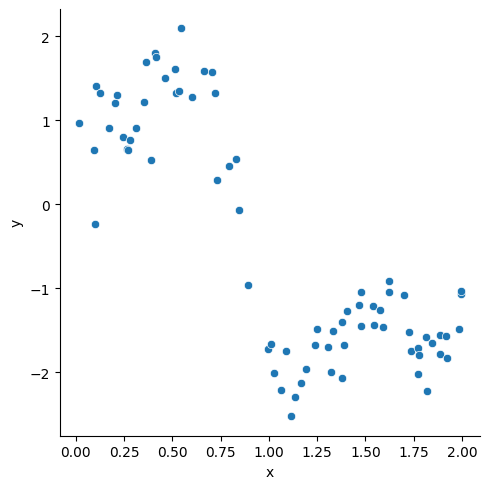

In [51]:
d = pd.read_csv("../data/d1.csv")
sns.relplot(x="x", y="y", data=d)

In [52]:
y, X = dmatrices("y ~ bs(x, df=6)", data=d)
X

DesignMatrix with shape (75, 7)
  Columns:
    ['Intercept',
     'bs(x, df=6)[0]',
     'bs(x, df=6)[1]',
     'bs(x, df=6)[2]',
     'bs(x, df=6)[3]',
     'bs(x, df=6)[4]',
     'bs(x, df=6)[5]']
  Terms:
    'Intercept' (column 0), 'bs(x, df=6)' (columns 1:7)
  (to view full data, use np.asarray(this_obj))

## What is `bs(x)[i]`?

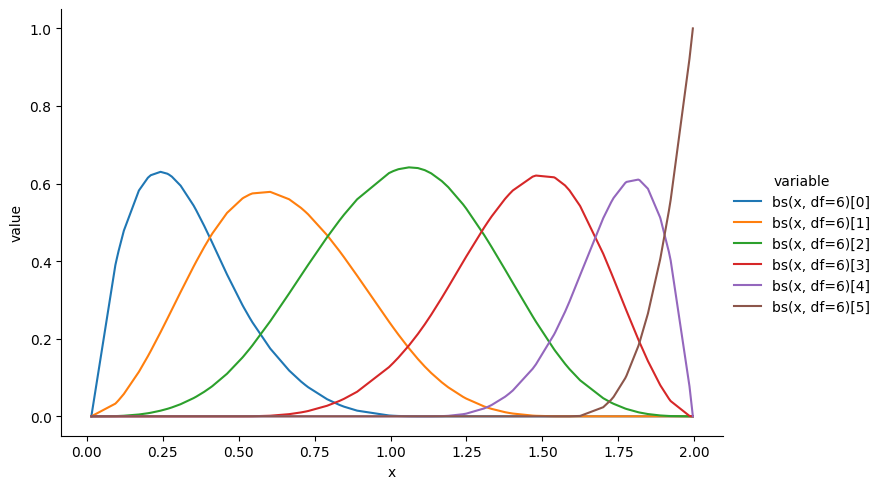

In [53]:
bs_df = ( 
  dmatrix("bs(x, df=6)", data=d, return_type="dataframe")
  .drop(["Intercept"], axis = 1)
  .assign(x = d["x"])
  .melt(id_vars="x")
)
sns.relplot(x="x", y="value", hue="variable", kind="line", data = bs_df, aspect=1.5)

## Fitting a model

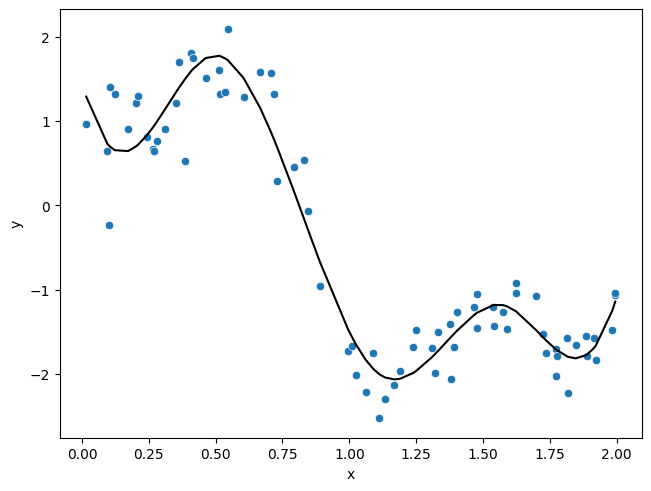

In [56]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=False).fit(X,y)
lm.coef_
plt.figure(layout="constrained")
sns.lineplot(x=d["x"], y=lm.predict(X).ravel(), color="k")
sns.scatterplot(x="x", y="y", data=d)
plt.show()

## sklearn SplineTransformer

In [57]:
from sklearn.preprocessing import SplineTransformer
p = make_pipeline(
  SplineTransformer(
    n_knots=6, 
    degree=3, 
    include_bias=True
  ),
  LinearRegression(fit_intercept=False)
).fit(
  d[["x"]], d["y"])

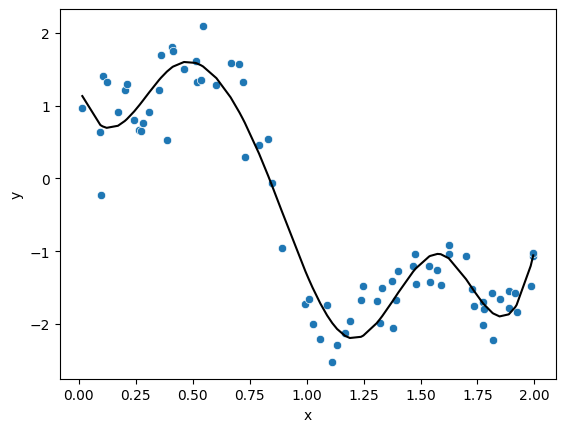

In [58]:
plt.figure()
sns.lineplot(x=d["x"], y=p.predict(d[["x"]]).ravel(), color="k")
sns.scatterplot(x="x", y="y", data=d)
plt.show()

## Why different?

For patsy the number of splines is determined by `df` while for sklearn this is determined by `n_knots + degree - 1`.

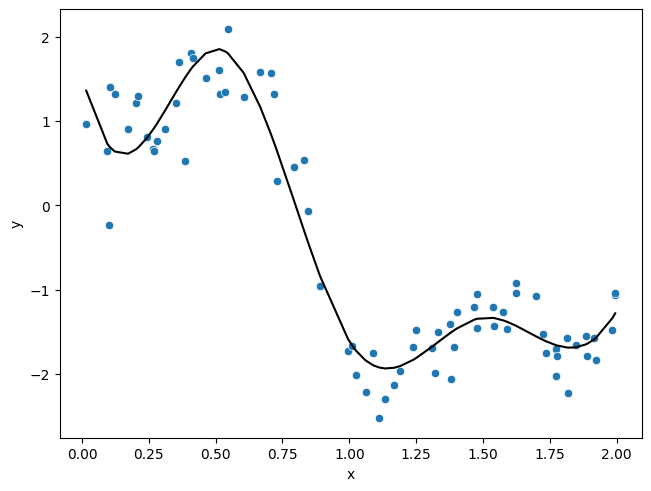

In [59]:
p = p.set_params(splinetransformer__n_knots = 5).fit(d[["x"]], d["y"])
plt.figure(layout="constrained")
sns.lineplot(x=d["x"], y=p.predict(d[["x"]]).ravel(), color="k")
sns.scatterplot(x="x", y="y", data=d)
plt.show()

---

but that is not the whole story, if we examine the bases we also see they differ slightly between implementations:

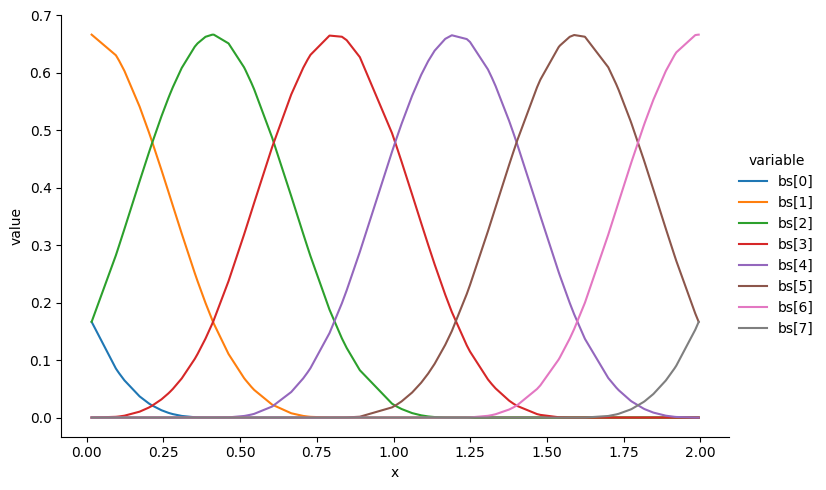

In [60]:
bs_df = pd.DataFrame(
  SplineTransformer(n_knots=6, degree=3, include_bias=True).fit_transform(d[["x"]]),
  columns = ["bs["+ str(i) +"]" for i in range(8)]
).assign(
  x = d.x
).melt(
  id_vars = "x"
)
sns.relplot(x="x", y="value", hue="variable", kind="line", data = bs_df, aspect=1.5)

## statsmodels

> statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.

```{python}
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as tsa
```

--

`statsmodels` uses slightly different terminology for refering to `y` / dependent / response and `x` / independent / explanatory variables. Specificially it uses `endog` to refer to the `y` and `exog` to refer to the `x` variable(s).

This is particularly important when using the main API, less so when using the formula API.

---

## OpenIntro Loans data

.small[
> This data set represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals. Of course, not all loans are created equal. Someone who is a essentially a sure bet to pay back a loan will have an easier time getting a loan with a low interest rate than someone who appears to be riskier. And for people who are very risky? They may not even get a loan offer, or they may not have accepted the loan offer due to a high interest rate. It is important to keep that last part in mind, since this data set only represents loans actually made, i.e. do not mistake this data for loan applications!

For the full data dictionary see [here](https://www.openintro.org/data/index.php?data=loan50). We have removed some of the columns to make the data set more reasonably sized and also droped any rows with missing values.



In [62]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as tsa

In [63]:
loans = pd.read_csv("../data/openintro_loans.csv")
loans

,state,emp_length,term,homeownership,annual_income,verified_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_purpose,loan_amount,grade,interest_rate,public_record_bankrupt,loan_status
0,NJ,3,60,MORTGAGE,90000.0,Verified,18.01,70795,38767,6,moving,28000,C,14.07,0,Current
1,HI,10,36,RENT,40000.0,Not Verified,5.04,28800,4321,4,debt_consolidation,5000,C,12.61,1,Current
2,WI,3,36,RENT,40000.0,Source Verified,21.15,24193,16000,6,other,2000,D,17.09,0,Current
3,PA,1,36,RENT,30000.0,Not Verified,10.16,25400,4997,2,debt_consolidation,21600,A,6.72,0,Current
4,CA,10,36,RENT,35000.0,Verified,57.96,69839,52722,13,credit_card,23000,C,14.07,0,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9177,TX,10,36,RENT,108000.0,Source Verified,22.28,199195,77963,4,other,24000,A,7.35,1,Current
9178,PA,8,36,MORTGAGE,121000.0,Verified,32.38,382061,101571,8,debt_consolidation,10000,D,19.03,0,Current
9179,CT,10,36,MORTGAGE,67000.0,Verified,45.26,346402,95421,5,debt_consolidation,30000,E,23.88,0,Current
9180,WI,1,36,MORTGAGE,80000.0,Source Verified,11.99,294475,27641,2,other,24000,A,5.32,0,Current


In [64]:
print(loans.columns)

Index(['state', 'emp_length', 'term', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'total_credit_limit',
       'total_credit_utilized', 'num_cc_carrying_balance', 'loan_purpose',
       'loan_amount', 'grade', 'interest_rate', 'public_record_bankrupt',
       'loan_status'],
      dtype='object')


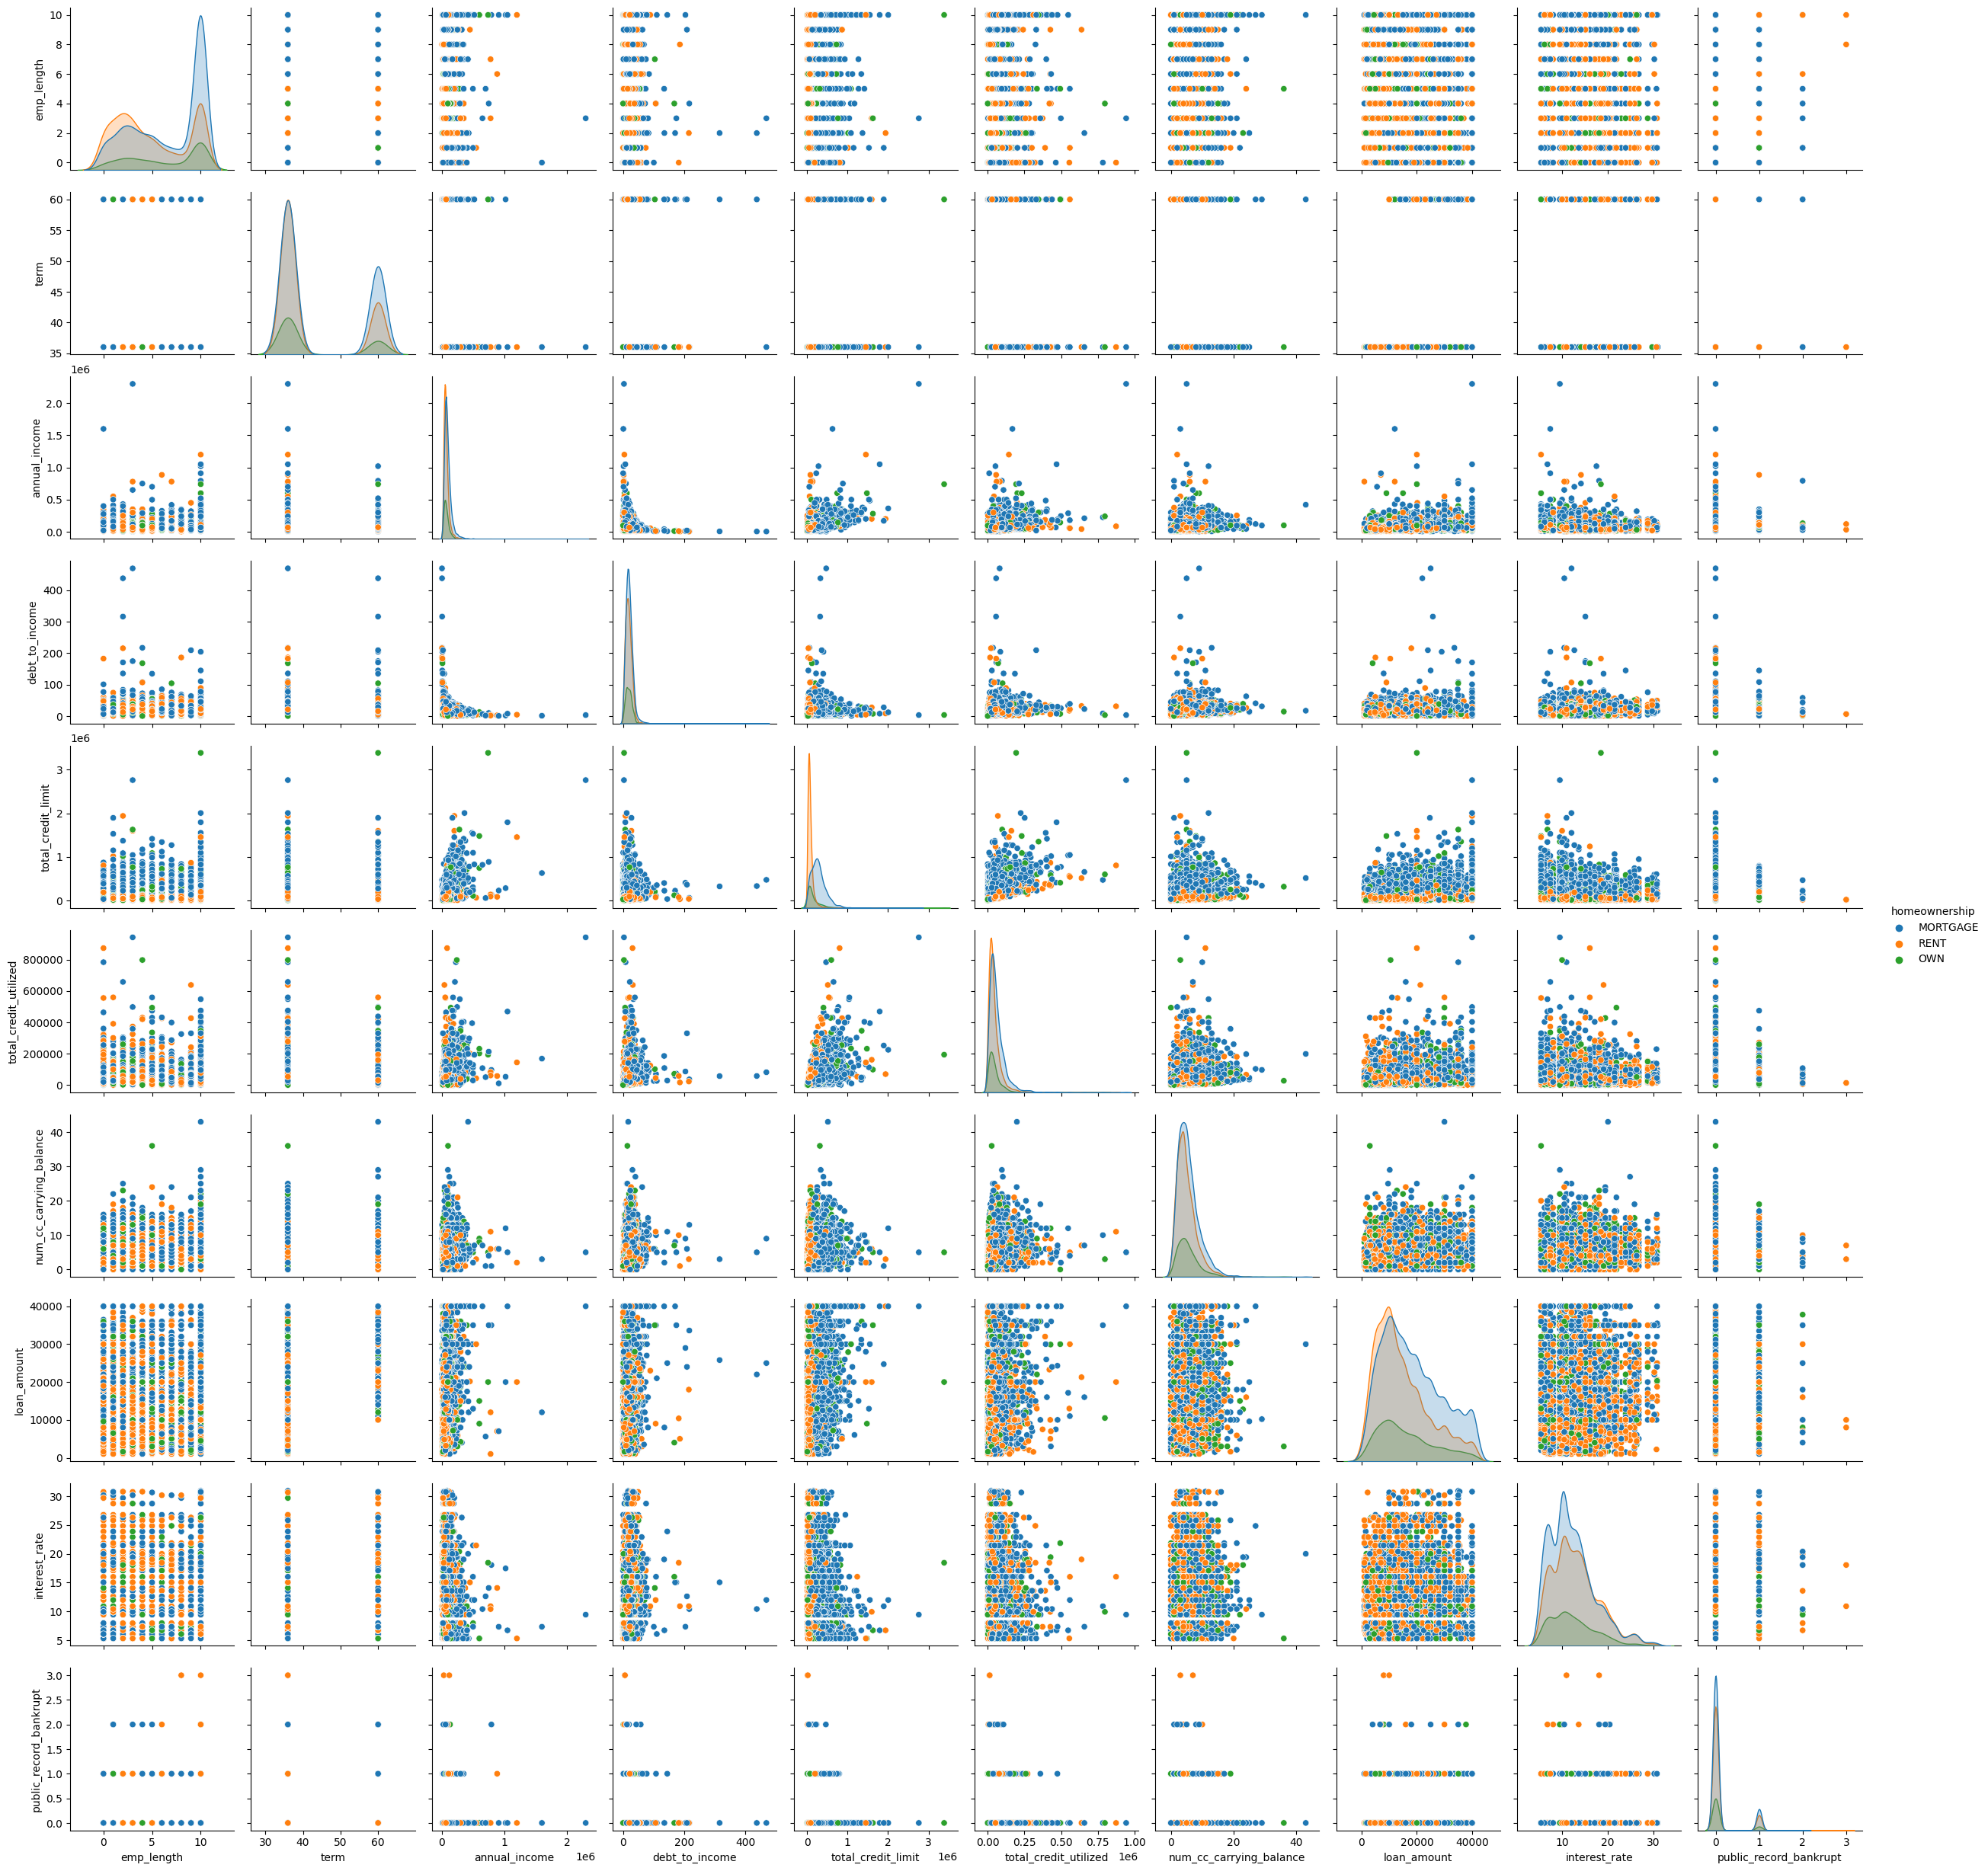

In [66]:
sns.pairplot(loans, hue='homeownership')

## OLS

In [125]:
y = loans["loan_amount"]
X = loans[["homeownership", "annual_income", "debt_to_income", "interest_rate", "public_record_bankrupt"]]

In [126]:
model = sm.OLS(endog=y, exog=X)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

        What do you think the issue is here?
The error occurs because `X` contains mixed types - specifically we have categorical data columns which cannot be directly converted to a numeric dtype so we need to take care of the dummy coding for statsmodels (with this interface).

In [127]:
X_dc = pd.get_dummies(X)
X_dc 

,annual_income,debt_to_income,interest_rate,public_record_bankrupt,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT
0,90000.0,18.01,14.07,0,True,False,False
1,40000.0,5.04,12.61,1,False,False,True
2,40000.0,21.15,17.09,0,False,False,True
3,30000.0,10.16,6.72,0,False,False,True
4,35000.0,57.96,14.07,0,False,False,True
...,...,...,...,...,...,...,...
9177,108000.0,22.28,7.35,1,False,False,True
9178,121000.0,32.38,19.03,0,True,False,False
9179,67000.0,45.26,23.88,0,True,False,False
9180,80000.0,11.99,5.32,0,True,False,False


In [128]:
model = sm.OLS(endog=y, exog=np.array(X_dc.values.tolist(), dtype =float))

## Fitting and summary

In [129]:
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     239.5
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          2.33e-285
Time:                        23:21:31   Log-Likelihood:                -97245.
No. Observations:                9182   AIC:                         1.945e+05
Df Residuals:                    9175   BIC:                         1.946e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0505      0.002     31.952      0.0

---

## Formula interface

Most of the modeling interfaces are also provided by `smf` (`statsmodels.formula.api`) in which case patsy is used to construct the model matrices.


In [130]:
model = smf.ols(
  "loan_amount ~ homeownership + annual_income + debt_to_income + interest_rate + public_record_bankrupt",
  data = loans  
)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     239.5
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          2.33e-285
Time:                        23:22:59   Log-Likelihood:                -97245.
No. Observations:                9182   AIC:                         1.945e+05
Df Residuals:                    9175   BIC:                         1.946e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.00

## Result values and model parameters

In [131]:
res.params

Intercept                 10020.003630
homeownership[T.OWN]      -1139.589268
homeownership[T.RENT]     -2573.465175
annual_income                 0.050505
debt_to_income               65.664103
interest_rate               204.247993
public_record_bankrupt    -1362.325291
dtype: float64

In [132]:
res.bse

Intercept                 357.244896
homeownership[T.OWN]      322.361151
homeownership[T.RENT]     221.101300
annual_income               0.001581
debt_to_income              7.310428
interest_rate              20.447644
public_record_bankrupt    306.019080
dtype: float64

In [133]:
res.rsquared

0.13542611095847523

In [134]:
res.aic

194503.99751598848

In [135]:
res.bic

194553.87251826216

In [136]:
res.predict()

array([18621.86199365, 11010.94015072, 14346.14515741, ...,
       21253.25931821, 15934.3409719 , 14375.36166461])

## Diagnostic plots

*QQ Plot*

<Figure size 640x480 with 0 Axes>

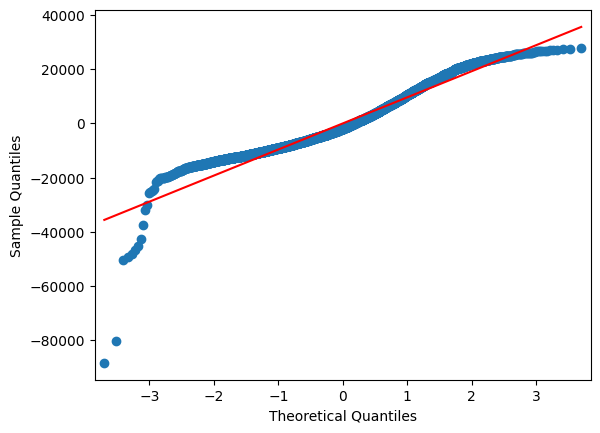

In [137]:
plt.figure()
sm.graphics.qqplot(res.resid, line="s")
plt.show()

<Figure size 640x480 with 0 Axes>

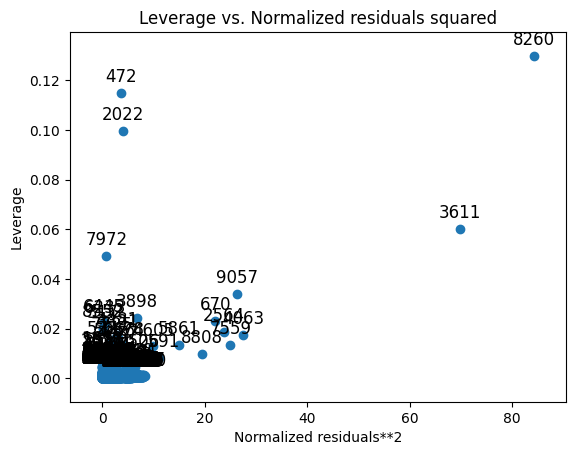

In [138]:
plt.figure()
sm.graphics.plot_leverage_resid2(res)
plt.show()

## Alternative model

In [139]:
res = smf.ols(
  "np.sqrt(loan_amount) ~ homeownership + annual_income + debt_to_income + interest_rate + public_record_bankrupt",
  data = loans  
).fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     np.sqrt(loan_amount)   R-squared:                       0.132
Model:                              OLS   Adj. R-squared:                  0.132
Method:                   Least Squares   F-statistic:                     232.7
Date:                  Thu, 06 Jul 2023   Prob (F-statistic):          1.16e-277
Time:                          23:25:05   Log-Likelihood:                -46429.
No. Observations:                  9182   AIC:                         9.287e+04
Df Residuals:                      9175   BIC:                         9.292e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

<Figure size 640x480 with 0 Axes>

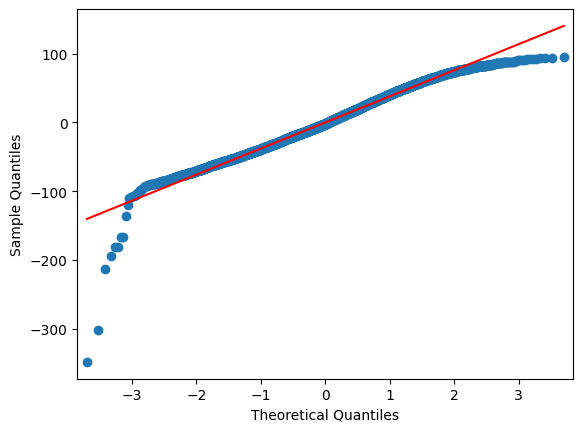

In [140]:
plt.figure()
sm.graphics.qqplot(res.resid, line="s")
plt.show()

<Figure size 640x480 with 0 Axes>

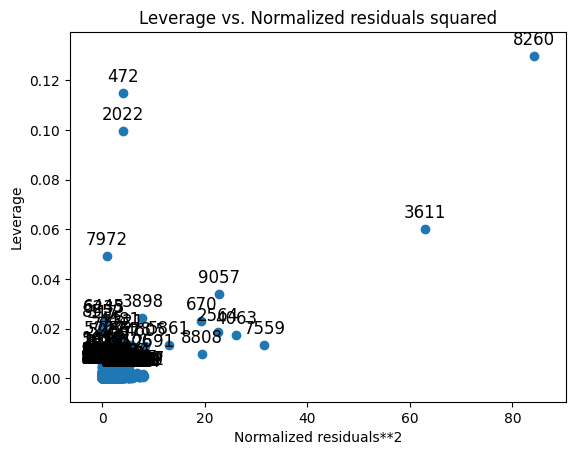

In [141]:
plt.figure()
sm.graphics.plot_leverage_resid2(res)
plt.show()

## Bushtail Possums

> Data representing possums in Australia and New Guinea. This is a copy of the data set by the same name in the DAAG package, however, the data set included here includes fewer variables.
>
> `pop` - Population, either `Vic` (Victoria) or `other` (New South Wales or Queensland).


In [142]:
possum = pd.read_csv("../data/possum.csv")
possum

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0
...,...,...,...,...,...,...,...,...
99,7,other,m,1.0,89.5,56.0,81.5,36.5
100,7,other,m,1.0,88.6,54.7,82.5,39.0
101,7,other,f,6.0,92.4,55.0,89.0,38.0
102,7,other,m,4.0,91.5,55.2,82.5,36.5


In [146]:
y = pd.get_dummies( possum["pop"] )
X = pd.get_dummies( possum.drop(["site","pop"], axis=1) )

In [147]:
model = sm.GLM(y, np.asarray(X.values.tolist(), dtype=float), family = sm.families.Binomial(), missing="drop")

In [148]:
res = model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       ['Vic', 'other']   No. Observations:                  102
Model:                            GLM   Df Residuals:                       95
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.942
Date:                Thu, 06 Jul 2023   Deviance:                       63.885
Time:                        23:29:44   Pearson chi2:                     154.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5234
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1373      0.183      0.751      0.4

## Logistic regression models (GLM

## Success vs failure

Note `endog` can be 1d or 2d for binomial models - in the case of the latter each row is interpreted as [success, failure].

In [150]:
y = pd.get_dummies( possum["pop"], drop_first = True)
X = pd.get_dummies( possum.drop(["site","pop"], axis=1) )
res = sm.GLM(y, np.asarray(X.values.tolist(), dtype=float), family = sm.families.Binomial(), missing="drop").fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  other   No. Observations:                  102
Model:                            GLM   Df Residuals:                       95
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.942
Date:                Thu, 06 Jul 2023   Deviance:                       63.885
Time:                        23:30:35   Pearson chi2:                     154.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5234
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1373      0.183     -0.751      0.4

In [151]:
res = model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       ['Vic', 'other']   No. Observations:                  102
Model:                            GLM   Df Residuals:                       95
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.942
Date:                Thu, 06 Jul 2023   Deviance:                       63.885
Time:                        23:30:48   Pearson chi2:                     154.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5234
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1373      0.183      0.751      0.4

In [152]:
res = smf.glm(
  "pop ~ sex + age + head_l + skull_w + total_l + tail_l-1",
  data = possum, 
  family = sm.families.Binomial(), 
  missing="drop"
).fit()
print(res.summary())

                     Generalized Linear Model Regression Results                      
Dep. Variable:     ['pop[Vic]', 'pop[other]']   No. Observations:                  102
Model:                                    GLM   Df Residuals:                       95
Model Family:                        Binomial   Df Model:                            6
Link Function:                          Logit   Scale:                          1.0000
Method:                                  IRLS   Log-Likelihood:                -31.942
Date:                        Thu, 06 Jul 2023   Deviance:                       63.885
Time:                                23:31:04   Pearson chi2:                     154.
No. Iterations:                             7   Pseudo R-squ. (CS):             0.5234
Covariance Type:                    nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

## sleepstudy data

> These data are from the study described in Belenky et al. (2003), for the most sleep-deprived group (3 hours time-in-bed) and for the first 10 days of the study, up to the recovery period. The original study analyzed speed (1/(reaction time)) and treated day as a categorical rather than a continuous predictor.
>
> The average reaction time per day (in milliseconds) for subjects in a sleep deprivation study.
> Days 0-1 were adaptation and training (T1/T2), day 2 was baseline (B); sleep deprivation started after day 2.


In [153]:
sleep = pd.read_csv("../data/sleepstudy.csv")
sleep

,Reaction,Days,Subject
0,249.5600,0,308
1,258.7047,1,308
2,250.8006,2,308
3,321.4398,3,308
4,356.8519,4,308
...,...,...,...
175,329.6076,5,372
176,334.4818,6,372
177,343.2199,7,372
178,369.1417,8,372


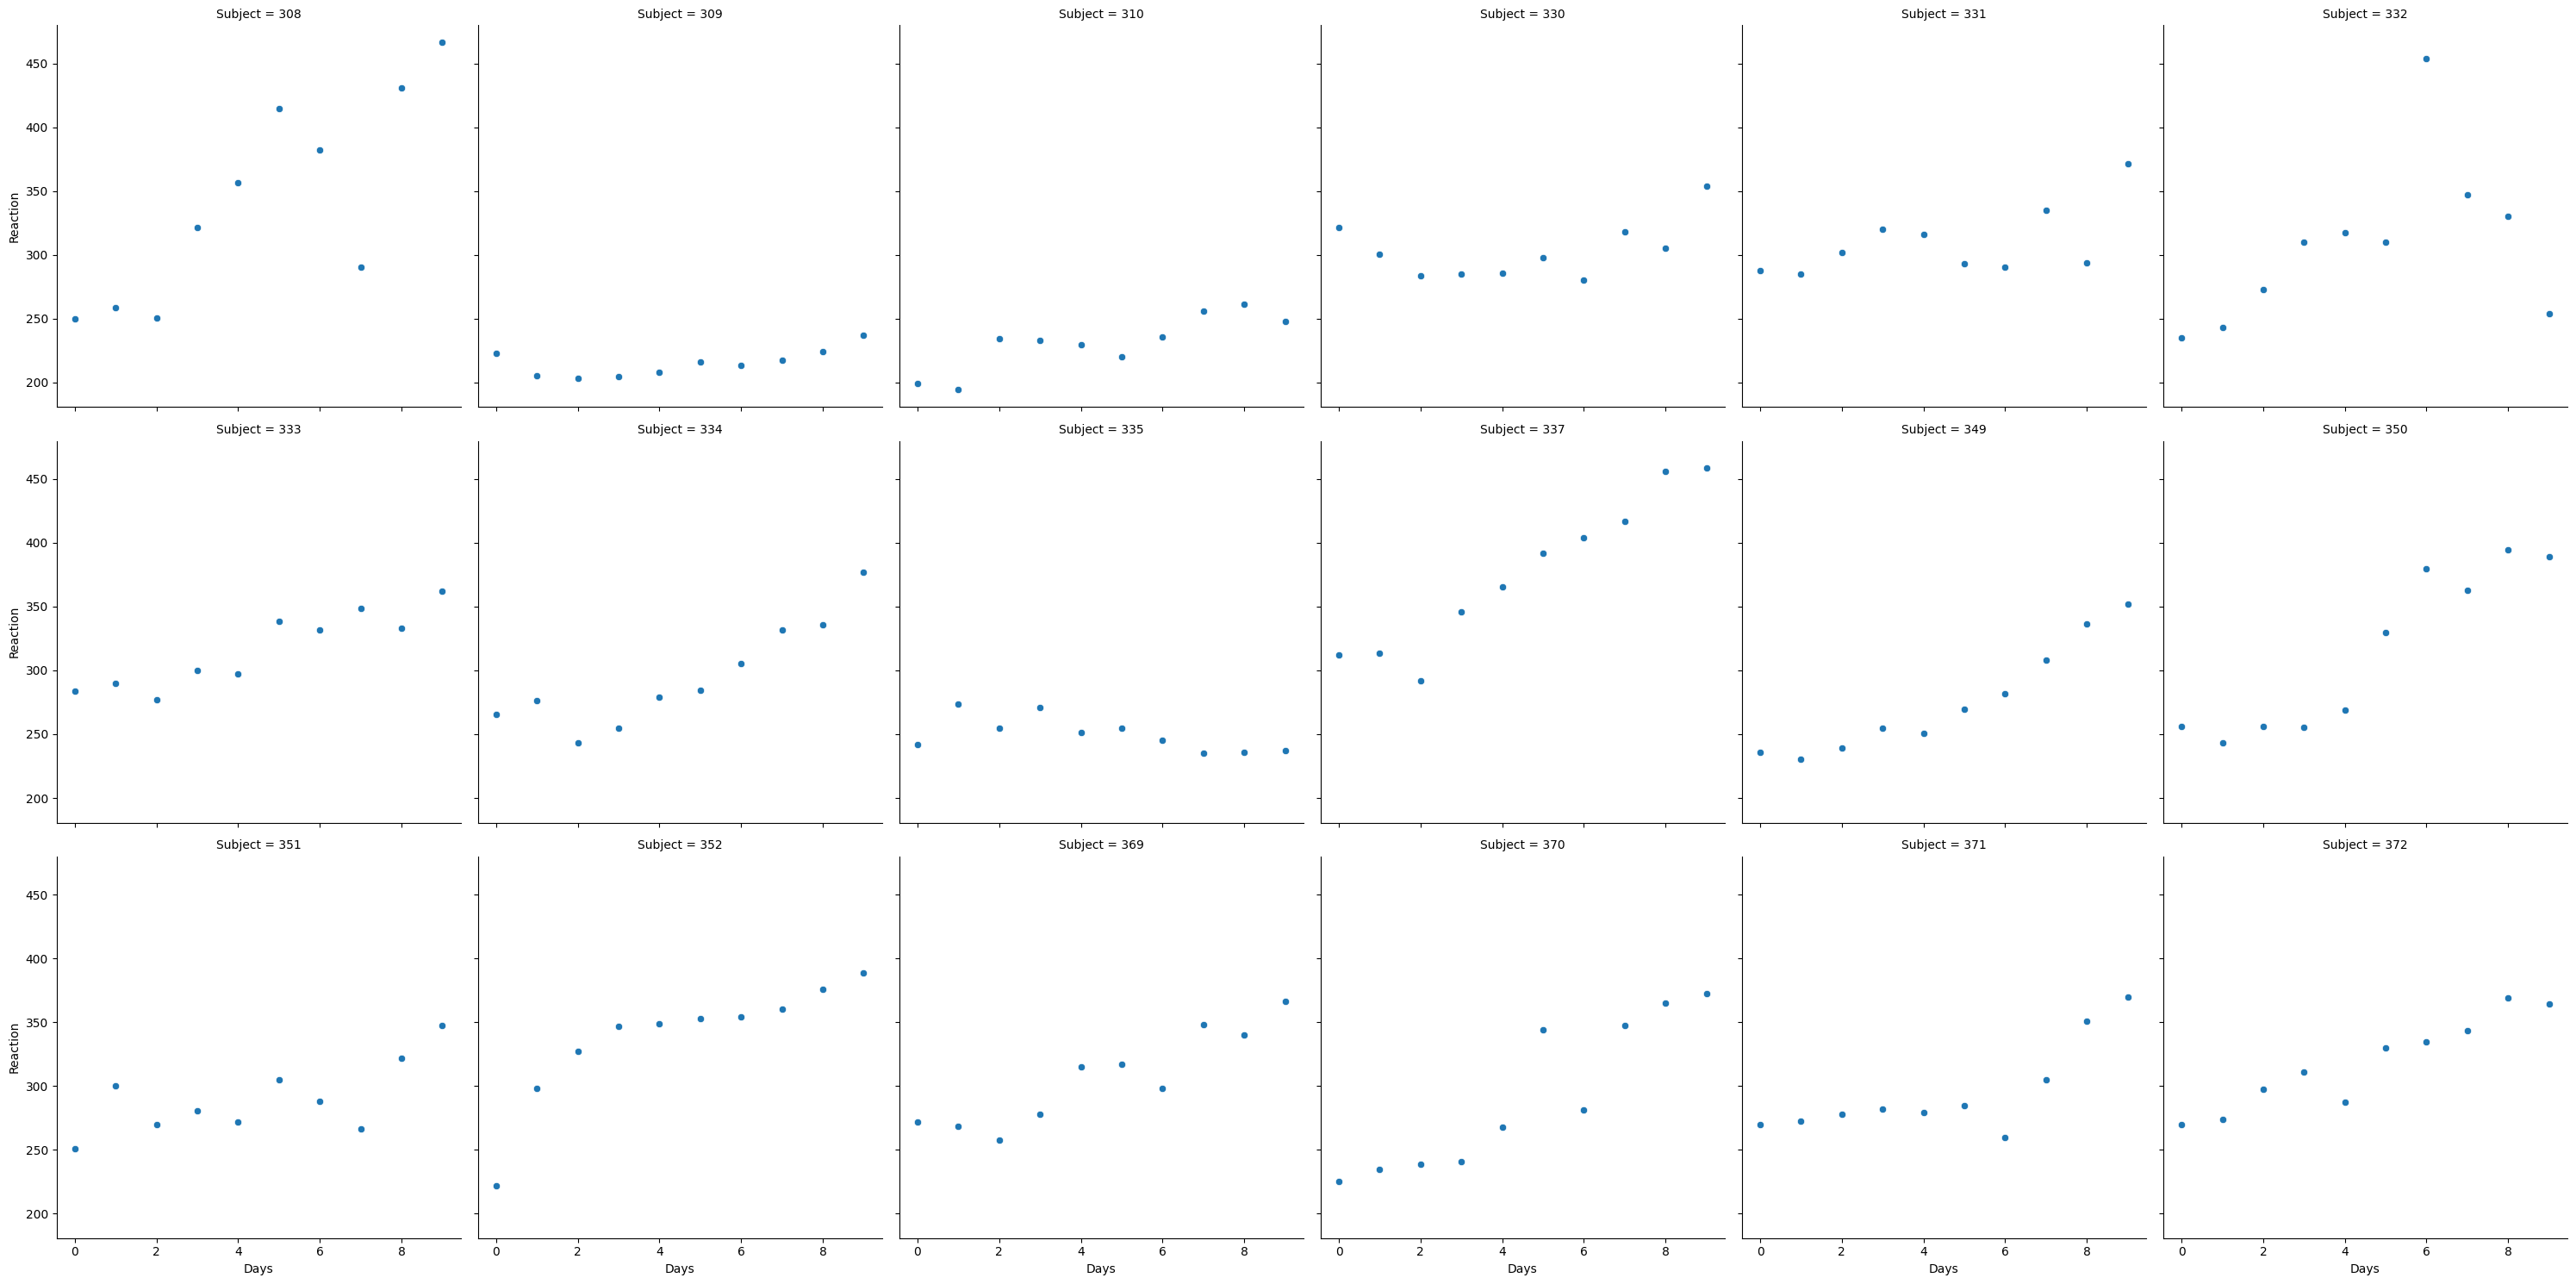

In [154]:
sns.relplot(x="Days", y="Reaction", col="Subject", col_wrap=6, data=sleep)

## Random intercept model

In [158]:
me_rand_int = smf.mixedlm("Reaction ~ Days", data=sleep, groups=sleep["Subject"], subset=sleep.Days >= 2)
res_rand_int = me_rand_int.fit(method=["lbfgs"])
print(res_rand_int.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Reaction 
No. Observations:  180     Method:             REML     
No. Groups:        18      Scale:              960.4529 
Min. group size:   10      Log-Likelihood:     -893.2325
Max. group size:   10      Converged:          Yes      
Mean group size:   10.0                                 
--------------------------------------------------------
           Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  251.405    9.747 25.793 0.000 232.302 270.509
Days        10.467    0.804 13.015 0.000   8.891  12.044
Group Var 1378.232   17.157                             



In [162]:
# Dictionary of random effects estimates
re = res_rand_int.random_effects
# Multiply each RE by the random effects design matrix for each group
rex = [np.dot(me_rand_int.exog_re_li[j], re[k]) for (j, k) in enumerate(me_rand_int.group_labels)]
# Add the fixed and random terms to get the overall prediction
rex = np.concatenate(rex)
y_hat = res_rand_int.predict() + rex

In [163]:
me_rand_sl= smf.mixedlm(
  "Reaction ~ Days", data=sleep, groups=sleep["Subject"], 
  subset=sleep.Days >= 2,
  re_formula="~Days" 
)
res_rand_sl = me_rand_sl.fit(method=["lbfgs"])
print(res_rand_sl.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Reaction 
No. Observations:    180       Method:               REML     
No. Groups:          18        Scale:                654.9412 
Min. group size:     10        Log-Likelihood:       -871.8141
Max. group size:     10        Converged:            Yes      
Mean group size:     10.0                                     
--------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept        251.405    6.825 36.838 0.000 238.029 264.781
Days              10.467    1.546  6.771 0.000   7.438  13.497
Group Var        612.089   11.881                             
Group x Days Cov   9.605    1.820                             
Days Var          35.072    0.610                             



## t-test and z-test for equality of means

In [164]:
cm = sm.stats.CompareMeans(
  sm.stats.DescrStatsW( books.weight[books.cover == "hb"] ),
  sm.stats.DescrStatsW( books.weight[books.cover == "pb"] )
)
print(cm.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1    168.3036    136.636      1.232      0.240    -126.880     463.487


In [165]:
print(cm.summary(use_t=False))

                          Test for equality of means                          
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1    168.3036    136.636      1.232      0.218     -99.497     436.104


In [166]:
print(cm.summary(usevar="unequal"))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1    168.3036    136.360      1.234      0.239    -126.686     463.293


## Contigency tables

Below are data from the GSS and a survery of Duke students in a intro stats class - the question asked about how concerned the respondent was about the effect of global warming on polar ice cap melt.

In [167]:
gss = pd.DataFrame({"US": [454, 226], "Duke": [56,32]}, index=["A great deal", "Not a great deal"])
gss

,US,Duke
A great deal,454,56
Not a great deal,226,32


In [168]:
tbl = sm.stats.Table2x2(gss.to_numpy())
print(tbl.summary())

               Estimate   SE   LCB    UCB  p-value
--------------------------------------------------
Odds ratio        1.148        0.723 1.823   0.559
Log odds ratio    0.138 0.236 -0.325 0.601   0.559
Risk ratio        1.016        0.962 1.074   0.567
Log risk ratio    0.016 0.028 -0.039 0.071   0.567
--------------------------------------------------


In [169]:
print(tbl.test_nominal_association())

df          1
pvalue      0.5587832913935942
statistic   0.3418152556383827


## End notebook.